<a href="https://colab.research.google.com/github/vishnupm-22/Credit_Card_Fraud_Detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVE:**
* The primary objective of this problem is to develop an accurate and efficient credit card fraud detection system that can distinguish between legitimate and fraudulent transactions in real-time.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**DATA GATHERING**
* Opening a local csv file using pandas 'read_csv' function

In [ ]:
credit_data = pd.read_csv('/content/drive/MyDrive/Data_sets/dataset_credit.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
credit_data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
119273,75391.0,-0.241435,0.970386,1.010177,1.587581,2.303380,4.429610,-0.211830,0.951680,-1.154356,...,-0.181341,-0.421324,-0.182697,0.974968,0.164543,0.144746,0.125019,-0.148294,9.83,0
50738,44625.0,-0.914234,1.193384,1.418464,0.889005,0.237590,1.145949,-0.157323,0.923059,-1.057227,...,-0.042256,-0.114660,0.081990,-0.667278,-0.435051,0.490274,0.010261,0.014000,1.79,0
91374,63440.0,-1.003595,-0.086424,1.246009,-0.897699,1.360749,0.774426,0.218876,0.593522,0.299742,...,0.068999,0.239506,0.230627,-0.968035,-0.822903,-0.042822,0.155699,0.165642,14.85,0
220252,142089.0,-0.246797,1.040666,-0.382110,-0.575483,0.648380,-1.069983,1.106956,-0.074793,-0.338141,...,0.137277,0.536878,-0.209399,0.099936,0.055583,-0.359422,-0.388266,-0.269525,1.00,0
48419,43634.0,-0.129822,-3.270569,0.651349,0.298731,-2.299121,0.708472,-0.449797,0.062451,0.288209,...,0.567749,0.347360,-0.678158,0.201860,0.131850,-0.169436,-0.041575,0.151933,735.60,0


In [ ]:
credit_data.shape

(284807, 31)

## **EDA**

**Class Distribution:**

In [ ]:
credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

*  **bar and pie plot** : shows that data is highly imbalanced (only 0.17 % data contributes to fraud )

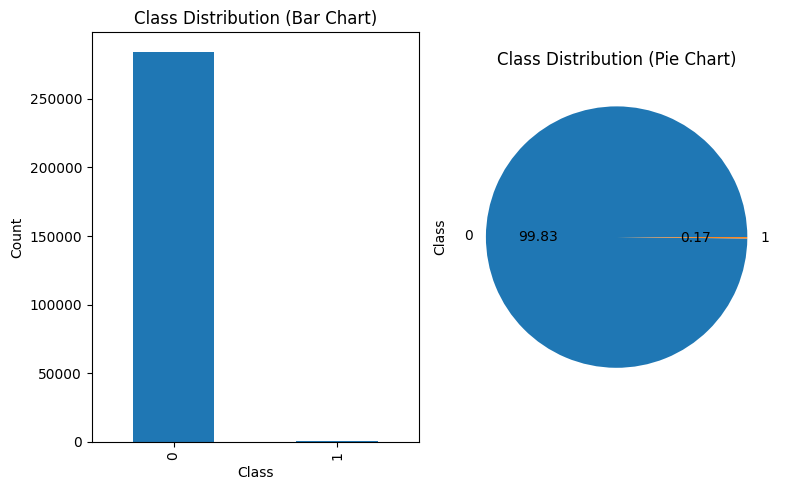

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

# Bar chart
credit_data['Class'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Class Distribution (Bar Chart)')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Pie chart
credit_data['Class'].value_counts().plot(kind='pie', autopct='%0.2f', ax=axes[1])
axes[1].set_title('Class Distribution (Pie Chart)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


With only two days worth of transaction data we can only gain some valuable insights by analyzing the patterns within this short timeframe.

**Time-based Analysis:**
* **Distplot** :
    * Fraudulent transactions have a distribution more even than valid
      transactions
    * Fraud Transactions : left skewed
    * legit Transactions : Right skewed
    * **Peak Hours**:
        * Identifying the specific hours during these two days when the majority of transactions, both legitimate and fraudulent, occurred.
        * from distribution plot we can infer that highest probability of both
          legit and fraud transactions occurs at some specific hour(between 10th and 12th hr in a day)  

<ipython-input-10-816fc002f996>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data[credit_data['Class'] == 0]['Hour'], hist=False, label='Legit')
<ipython-input-10-816fc002f996>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data[credit_data['Class'] == 1]['H

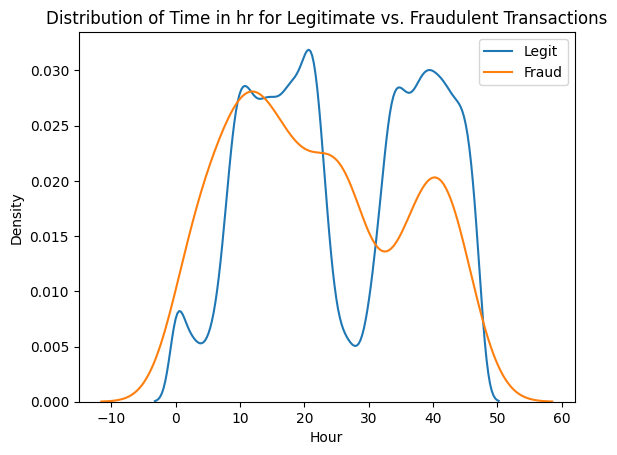

In [ ]:
# Assumimg time in data is in sec:

credit_data['Hour'] = credit_data['Time'].apply(lambda x: np.floor(x / 3600))

sns.distplot(credit_data[credit_data['Class'] == 0]['Hour'], hist=False, label='Legit')
sns.distplot(credit_data[credit_data['Class'] == 1]['Hour'], hist=False, label='Fraud')

# Set plot labels and title
plt.xlabel('Hour')
plt.ylabel('Density')
plt.title('Distribution of Time in hr for Legitimate vs. Fraudulent Transactions')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
credit_data[credit_data['Class']==0]['Hour'].skew()

-0.034920967425472654

In [ ]:
credit_data[credit_data['Class']==1]['Hour'].skew()
# +ve positively skewed torawds right

0.25370306523474034

In [ ]:
credit_data[credit_data['Class']==0]['Amount'].skew()

17.00314710107444

In [ ]:
credit_data[credit_data['Class']==1]['Amount'].skew()

3.7544765273817413

In [ ]:
legit = credit_data[credit_data['Class']==0]
fraud = credit_data[credit_data['Class']==1]

**daily basis transactions**
*  Group data by day and count transactions for legitimate and fraudulent cases
*  **Day-wise Patterns**:
      * Compare transaction volumes and types on each day. It might reveal if fraud rates differ significantly from one day to another.
      * As I have only transactions of 2 days ,there is no much significant difference in No of fraud transactions in 2 days.
* **Transaction Frequency:**
     * Identify users with an unusually high frequency of transactions within these two days. Rapid and frequent transactions by a single user might indicate suspicious activity.

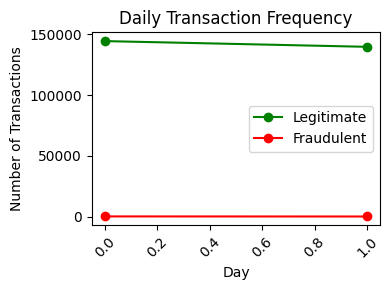

In [ ]:
# Convert the 'Time' column to days
credit_data['Day'] = (credit_data['Time'] // 86400)  # Assuming 1 day = 24 hours * 60 minutes * 60 seconds

legit_daily_counts = credit_data[credit_data['Class'] == 0].groupby('Day').size()
fraud_daily_counts = credit_data[credit_data['Class'] == 1].groupby('Day').size()

# Plotting
plt.figure(figsize=(4, 3))

# Plot legitimate transactions
plt.plot(legit_daily_counts.index, legit_daily_counts.values, marker='o', color='green', linestyle='-', label='Legitimate')

# Plot fraudulent transactions
plt.plot(fraud_daily_counts.index, fraud_daily_counts.values, marker='o', color='red', linestyle='-', label='Fraudulent')

plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Frequency')
plt.xticks(rotation=45)
plt.legend()  # Show legend indicating legit and fraud transactions
plt.tight_layout()
plt.show()


In [ ]:
fraud_daily_counts = credit_data[credit_data['Class'] == 1].groupby('Day').size()
fraud_daily_counts

Day
0.0    281
1.0    211
dtype: int64

In [ ]:
fraud_daily_counts = credit_data[credit_data['Class'] == 0].groupby('Day').size()
fraud_daily_counts

Day
0.0    144505
1.0    139810
dtype: int64

**Peak Hours**:
* Identifying the specific hours during these two days when the majority of transactions, both legitimate and fraudulent, occurred.
* From hourly transaction frequency : both the transaction count are high at 11th hr in a day.

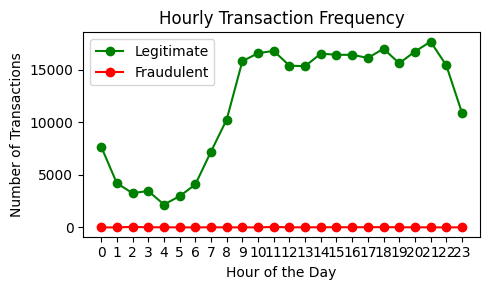

In [ ]:
# Convert the 'Time' column to hours
credit_data['Hour'] = (credit_data['Time'] // 3600) % 24  # Assuming 1 day = 24 hours * 60 minutes * 60 seconds

# Group data by hour and count transactions for legitimate and fraudulent cases
legit_hourly_counts = credit_data[credit_data['Class'] == 0].groupby('Hour').size()
fraud_hourly_counts = credit_data[credit_data['Class'] == 1].groupby('Hour').size()

# Plotting
plt.figure(figsize=(5,3))

# Plot legitimate transactions
plt.plot(legit_hourly_counts.index, legit_hourly_counts.values, marker='o', color='green', linestyle='-', label='Legitimate')

# Plot fraudulent transactions
plt.plot(fraud_hourly_counts.index, fraud_hourly_counts.values, marker='o', color='red', linestyle='-', label='Fraudulent')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Transaction Frequency')
plt.xticks(range(24))  # Assuming transactions occur in all 24 hours
plt.legend()  # Show legend indicating legit and fraud transactions
plt.tight_layout()
plt.show()


In [ ]:
legit_hourly_counts

Hour
0.0      7689
1.0      4210
2.0      3271
3.0      3475
4.0      2186
5.0      2979
6.0      4092
7.0      7220
8.0     10267
9.0     15822
10.0    16590
11.0    16803
12.0    15403
13.0    15348
14.0    16547
15.0    16435
16.0    16431
17.0    16137
18.0    17006
19.0    15630
20.0    16738
21.0    17687
22.0    15432
23.0    10917
dtype: int64

In [ ]:
fraud_hourly_counts

Hour
0.0      6
1.0     10
2.0     57
3.0     17
4.0     23
5.0     11
6.0      9
7.0     23
8.0      9
9.0     16
10.0     8
11.0    53
12.0    17
13.0    17
14.0    23
15.0    26
16.0    22
17.0    29
18.0    33
19.0    19
20.0    18
21.0    16
22.0     9
23.0    21
dtype: int64

**Transaction Amount Analysis:**
*   **Average Transaction Value**:
      * Calculate the average transaction amount for both fraudulent and legitimate transactions. Look for significant differences between the average amounts of these two categories.
      * The Avg Transaction value in fraud are significantly high than in legit transactions.
      * Avg Transaction value in fraud increased from day 1 to day 2,
       whereas Avg Transaction value in legit decreased from day 1 to day 2

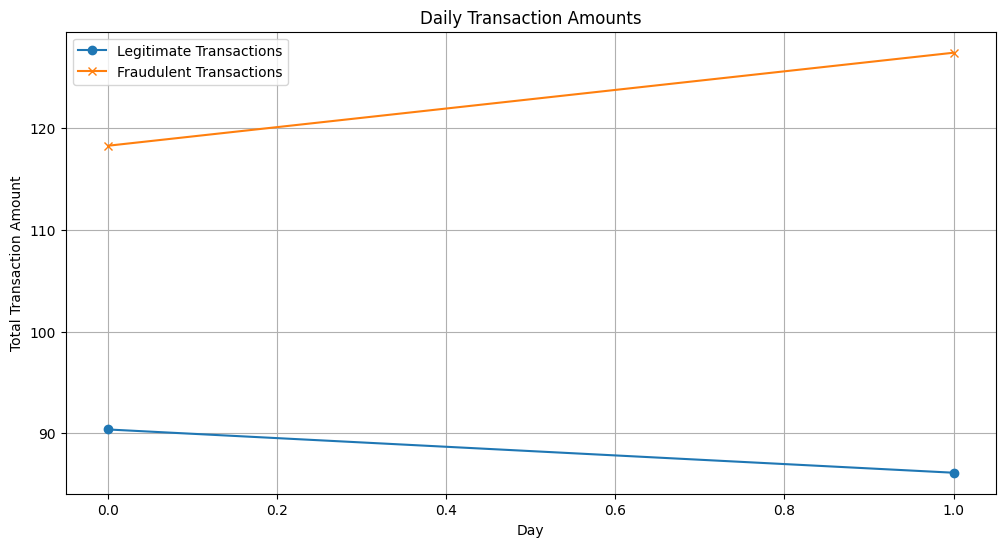

In [ ]:
credit_data['Day'] = (credit_data['Time'] // 86400)  # Assuming 1 day = 24 hours * 60 minutes * 60 seconds

Transaction_Amount_legit = credit_data[credit_data['Class'] == 0].groupby('Day')['Amount'].aggregate('mean').reset_index()
Transaction_Amount_fraud =  credit_data[credit_data['Class'] == 1].groupby('Day')['Amount'].aggregate('mean').reset_index()

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))  # Set the figure size

# Plot daily transaction amounts for legitimate transactions
plt.plot(Transaction_Amount_legit['Day'], Transaction_Amount_legit['Amount'], label='Legitimate Transactions', marker='o')

# Plot daily transaction amounts for fraudulent transactions
plt.plot(Transaction_Amount_fraud['Day'], Transaction_Amount_fraud['Amount'], label='Fraudulent Transactions', marker='x')

plt.xlabel('Day')
plt.ylabel('Total Transaction Amount')
plt.title('Daily Transaction Amounts')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Transaction_Amount_legit

,Day,Amount
0,0.0,90.382588
1,1.0,86.129219


In [ ]:
Transaction_Amount_fraud

,Day,Amount
0,0.0,118.288648
1,1.0,127.435355


**Dist plot** : shows that it is right skewed distribution for both transactions

<ipython-input-25-230c64056b61>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data[credit_data['Class']==0]['Amount'],hist=False)
<ipython-input-25-230c64056b61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data[credit_data['Class']==1]['Amount'],hist=False

<Axes: xlabel='Amount', ylabel='Density'>

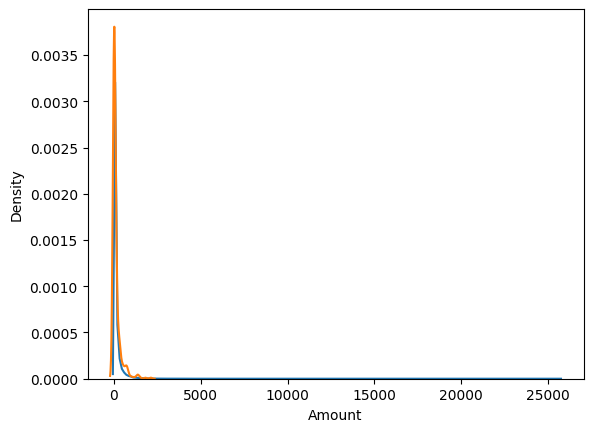

In [ ]:
sns.distplot(credit_data[credit_data['Class']==0]['Amount'],hist=False)
sns.distplot(credit_data[credit_data['Class']==1]['Amount'],hist=False)

From correlation matrix : wrt to target column v17,v14,v11  are highly correlated

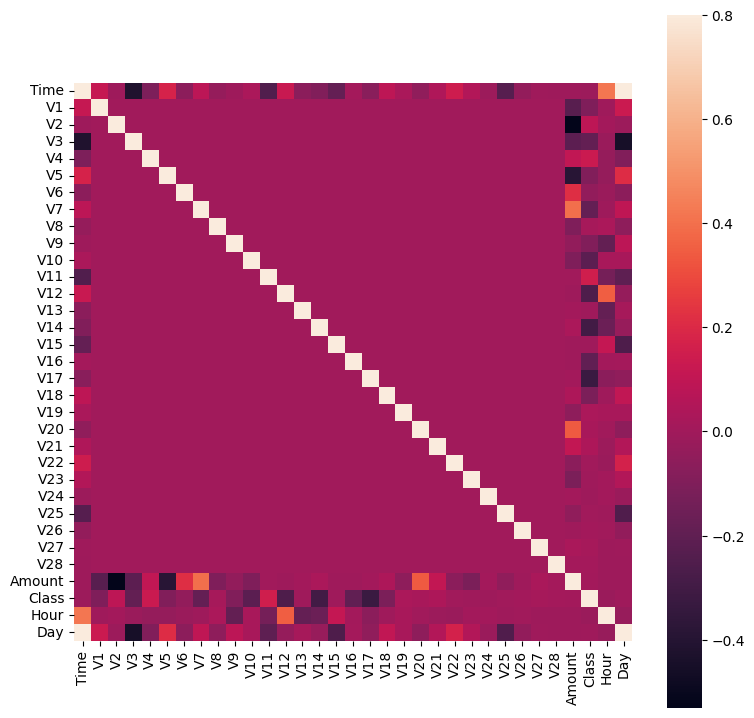

In [ ]:

# Correlation matrix
corrmat = credit_data.corr()
fig = plt.figure(figsize = (9, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Visualizing the distribution plots of V17,V14,V11

<ipython-input-27-0e51900c76d7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data[credit_data['Class'] == 0][feature], hist=False, label='Class 0', ax=ax)
<ipython-input-27-0e51900c76d7>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_data[credit_data['Clas

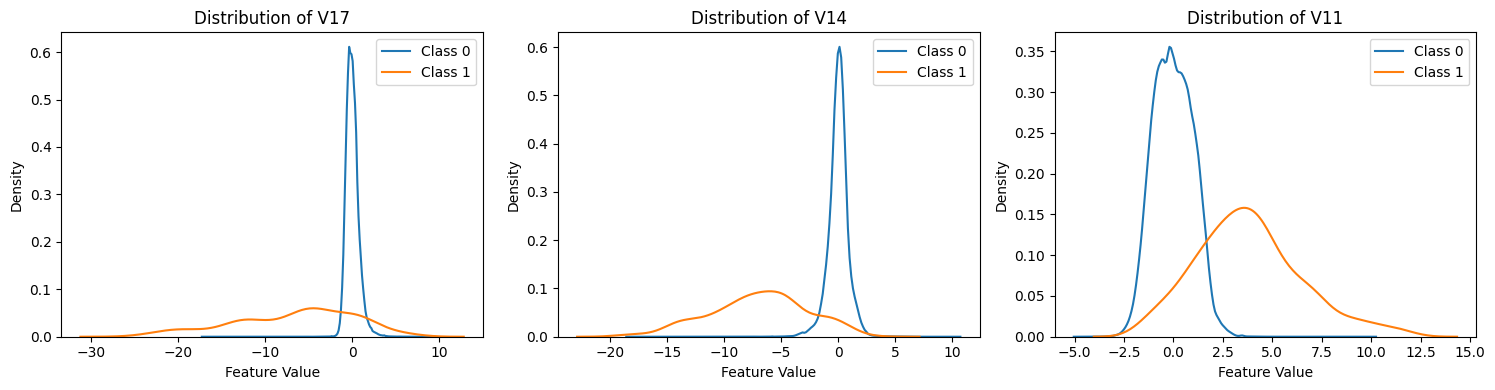

In [ ]:
features = ['V17', 'V14', 'V11']

# Create a subplot with a grid layout based on the number of features
fig, axes = plt.subplots(1, len(features), figsize=(15, 4))

for idx, feature in enumerate(features):
    ax = axes[idx]

    # Create a kernel density plot for Class 0
    sns.distplot(credit_data[credit_data['Class'] == 0][feature], hist=False, label='Class 0', ax=ax)

    # Create a kernel density plot for Class 1
    sns.distplot(credit_data[credit_data['Class'] == 1][feature], hist=False, label='Class 1', ax=ax)

    ax.set_xlabel('Feature Value')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
legit_sam = legit.sample(n = 492)  # takes any n samples
new_dataset = pd.concat([legit_sam,fraud],axis=0)  # row wise
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
124727,77402.0,1.128873,-0.006852,1.425815,1.417553,-1.119704,-0.380717,-0.536405,0.056732,0.833558,...,0.105629,0.032726,0.728615,0.379201,-0.430312,0.074320,0.042259,9.99,0,21.0
45581,42410.0,-2.179179,0.151578,0.781068,0.755666,-0.663186,1.967674,-0.040299,1.232564,-0.521605,...,0.166167,0.110794,-1.701593,0.491245,-0.140799,-0.021031,-0.403211,199.22,0,11.0
15018,26351.0,1.344143,-1.685137,1.519642,-0.949423,-2.234013,0.771197,-2.003291,0.366806,-0.509696,...,0.035265,-0.073788,0.049395,0.402745,-0.081142,0.105137,0.022151,31.50,0,7.0
267708,162888.0,0.048600,0.812156,0.253177,-0.592487,0.371766,-1.109182,0.958941,-0.161361,0.072296,...,-0.643377,0.069898,-0.051399,-0.506305,0.144605,0.242405,0.095172,2.69,0,45.0
268319,163152.0,-1.196037,1.585949,2.883976,3.378471,1.511706,3.717077,0.585362,-0.156001,0.122648,...,0.524395,-0.355170,-0.869790,-0.133198,0.327804,-0.035702,-0.858197,7.56,0,45.0


Feeding Unbalanced data to model will result in :
  * Biased Model
  * Overfitting
  * Misleading Accuracy

**Under Sampling Technique**
  * Undersampling involves randomly removing samples from the over-represented class (legitimate transactions) to balance the class distribution and create a more balanced dataset for training machine learning models.

In [ ]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [ ]:
# step 01: Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2) # 20 % data for test and 80 for train # stratifying Y for equal dis of 0s and 1s

**MODELLING** **TRAING AND EVALUATION**
* Created a pipeline which is a series of data preprocessing steps and models chained together in a specific sequence
* Preprocessing steps include Normalization : Robust Scaling which handles outliers
* Implementing Multiple Models such as LogisticRegression,SVM &RandomForestClassifier and also evaluated which model performs better by calculating Precision , recall & F1 score
   * SVM
      * SVM involves optimizing a hyperplane to maximize the margin between classes while considering misclassifications.
      * margin = argmax(w,b) 2/||w|| where ||w|| is  Euclidean norm of the weight vector.
      * Kernel: Kernel is the mathematical function, which is used in SVM to map the original input data points into high-dimensional feature spaces, so, that the hyperplane can be easily found out even if the data points are not linearly separable in the original input space.
      * linear K(w,b) = W.T * x + b
      * soft margin and hard margin

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import svm

# Assuming your features are in columns 0 to 28 and the target is in column 29
trf1 = ColumnTransformer([
    ('scaler', RobustScaler(), slice(0, 30))
])

# Creating the pipeline with feature scaling and classifier
pipeline_lr = Pipeline([
    ('preprocessor', trf1),
    ('classifier', LogisticRegression())
])

pipeline_rf = Pipeline([
    ('preprocessor', trf1),
    ('classifier1', RandomForestClassifier(n_estimators=250,random_state=42,max_features=20))
])

pipeline_svm = Pipeline([
    ('preprocessor', trf1),
    ('classifier', svm.SVC(kernel='linear'))
])


In [ ]:
# Assuming X_train, y_train, X_test, y_test are your training and testing data
pipeline_lr.fit(X_train, y_train)

pipeline_rf.fit(X_train, y_train)

pipeline_svm.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  slice(0, 30, None))])),
                ('classifier', SVC(kernel='linear'))])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming your models are already trained and stored in pipeline_lr, pipeline_rf, and pipeline_svm

# Make predictions on the test set
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_svm = pipeline_svm.predict(X_test)

# Calculate precision, recall, and F1-score for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Calculate precision, recall, and F1-score for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Calculate precision, recall, and F1-score for SVM
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1-score:", f1_lr)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-score:", f1_rf)
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1-score:", f1_svm)


Logistic Regression Accuracy: 0.934010152284264
Logistic Regression Precision: 0.9885057471264368
Logistic Regression Recall: 0.8775510204081632
Logistic Regression F1-score: 0.9297297297297297
Random Forest Precision: 0.9666666666666667
Random Forest Recall: 0.8877551020408163
Random Forest F1-score: 0.9255319148936171
SVM Precision: 0.9885057471264368
SVM Recall: 0.8775510204081632
SVM F1-score: 0.9297297297297297


cross-validation provides a more robust estimate of the model's performance.

In [ ]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy','precision','recall','f1']
scores = cross_validate(pipeline_lr,X, y,scoring=scoring,cv=10)
scores_rf = cross_validate(pipeline_rf,X, y,scoring=scoring,cv=10)
scores_svm = cross_validate(pipeline_svm,X, y,scoring=scoring,cv=10)

In [ ]:
scores

{'fit_time': array([0.06965542, 0.05837393, 0.08857107, 0.07511544, 0.0794661 ,
        0.08136582, 0.11687112, 0.08821678, 0.06108451, 0.06038404]),
 'score_time': array([0.01180935, 0.02978826, 0.0258956 , 0.0224483 , 0.0214529 ,
        0.0212028 , 0.03403258, 0.01230764, 0.01210809, 0.02178979]),
 'test_accuracy': array([0.96969697, 0.86868687, 0.97979798, 0.84848485, 0.87755102,
        0.95918367, 0.95918367, 0.93877551, 0.95918367, 0.87755102]),
 'test_precision': array([0.97916667, 1.        , 0.96153846, 0.90697674, 0.97435897,
        0.9787234 , 0.95918367, 0.95744681, 0.9787234 , 0.95121951]),
 'test_recall': array([0.95918367, 0.73469388, 1.        , 0.78      , 0.7755102 ,
        0.93877551, 0.95918367, 0.91836735, 0.93877551, 0.79591837]),
 'test_f1': array([0.96907216, 0.84705882, 0.98039216, 0.83870968, 0.86363636,
        0.95833333, 0.95918367, 0.9375    , 0.95833333, 0.86666667])}

In [ ]:
mean_lr = []
for i in scoring:
  strng = 'test_'+i
  print(f'Avearge {i} is {scores[strng].mean()}')
  mean_lr.append(scores[strng].mean())

Avearge accuracy is 0.9238095238095237
Avearge precision is 0.9647337649435934
Avearge recall is 0.8800408163265306
Avearge f1 is 0.917888619319905


In [ ]:
mean_rf = []
for i in scoring:
  strng = 'test_'+i
  print(f'Avearge {i} is {scores_rf[strng].mean()}')
  mean_rf.append(scores_rf[strng].mean())

Avearge accuracy is 0.9298495155638011
Avearge precision is 0.9513924397931923
Avearge recall is 0.9065306122448981
Avearge f1 is 0.9268976158264051


In [ ]:
mean_svm = []
for i in scoring:
  strng = 'test_'+i
  print(f'Avearge {i} is {scores_svm[strng].mean()}')
  mean_svm.append(scores_svm[strng].mean())

Avearge accuracy is 0.9217893217893216
Avearge precision is 0.966679500577917
Avearge recall is 0.8739183673469387
Avearge f1 is 0.9143980569749205


In [ ]:
y_pred_rf

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

Both Logistic Regression and Random Forest Classifier performes better than SVM